In [66]:
import pandas as pd 
import matplotlib.pyplot as plt

In [67]:
patients = pd.read_csv('..\data\processedWithHeader.cleveland.data', na_values='?') # clean question marks from data
patients.fillna(patients.mean(), inplace=True)
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [68]:
print(patients.shape)

(303, 14)


In [69]:
import seaborn as sns

Histogram of Ages

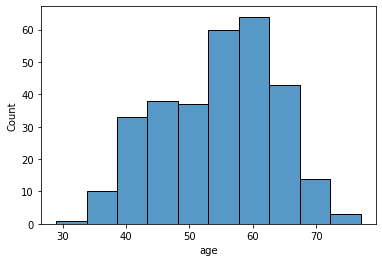

In [70]:
sns.histplot(data=patients,x="age", bins=10)
plt.show()

Boxplots of Key Health Parameters

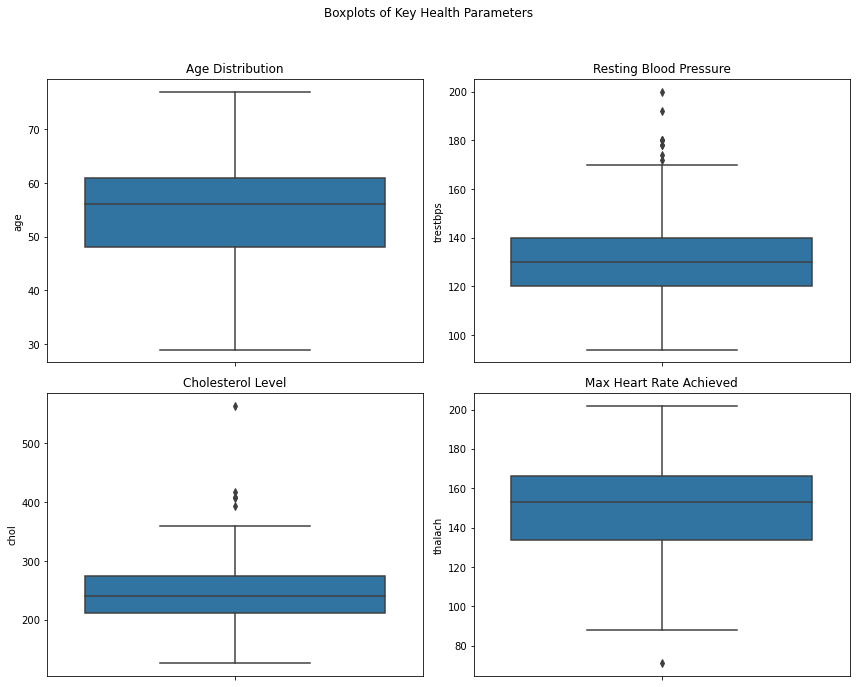

In [71]:
#set up the 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Boxplots of Key Health Parameters')

sns.boxplot(data=patients, y='age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.boxplot(data=patients, y='trestbps', ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure')

sns.boxplot(data=patients, y='chol', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Level')

sns.boxplot(data=patients, y='thalach', ax=axes[1, 1])
axes[1, 1].set_title('Max Heart Rate Achieved')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

Histogram for Each Numerical Param

In [72]:
import pylab as pl

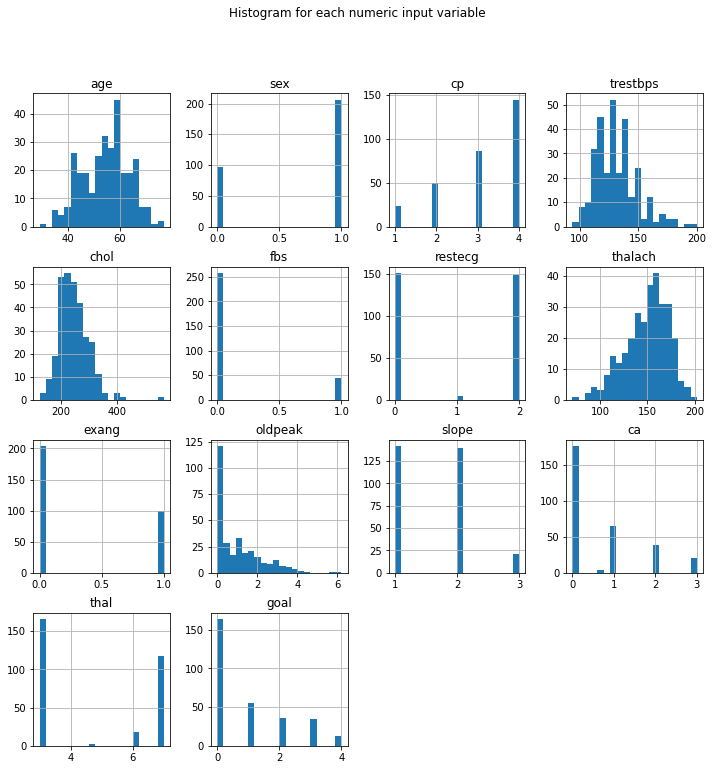

In [73]:
patients.hist(bins=20, figsize=(12,12))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('patients_hist')
plt.show()

In [74]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

Scatter Matrix

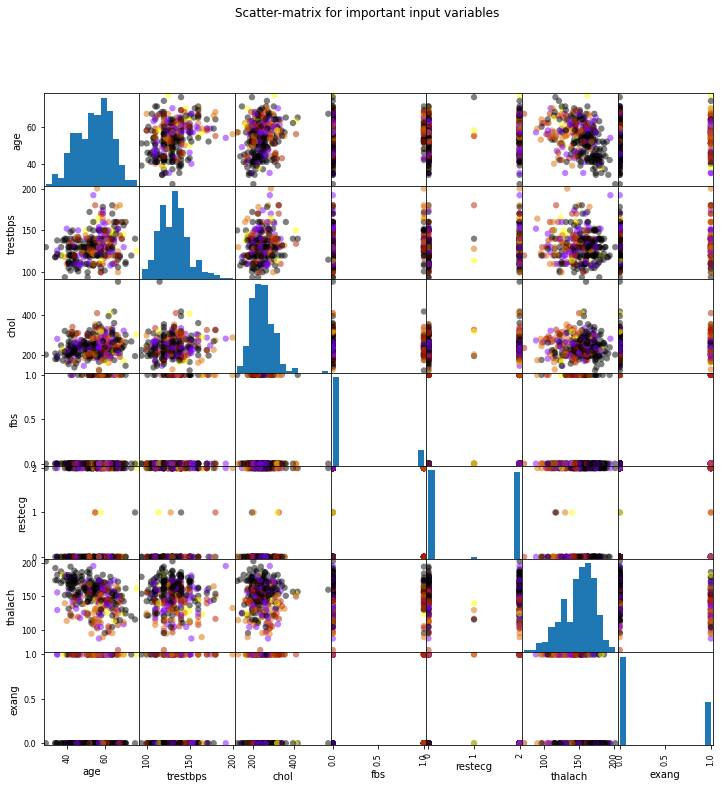

In [75]:
feature_names = ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']
X = patients[feature_names].copy()
y = patients['goal'].copy()
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)
plt.suptitle('Scatter-matrix for important input variables')
plt.savefig('fruits_scatter_matrix')

Pairplot

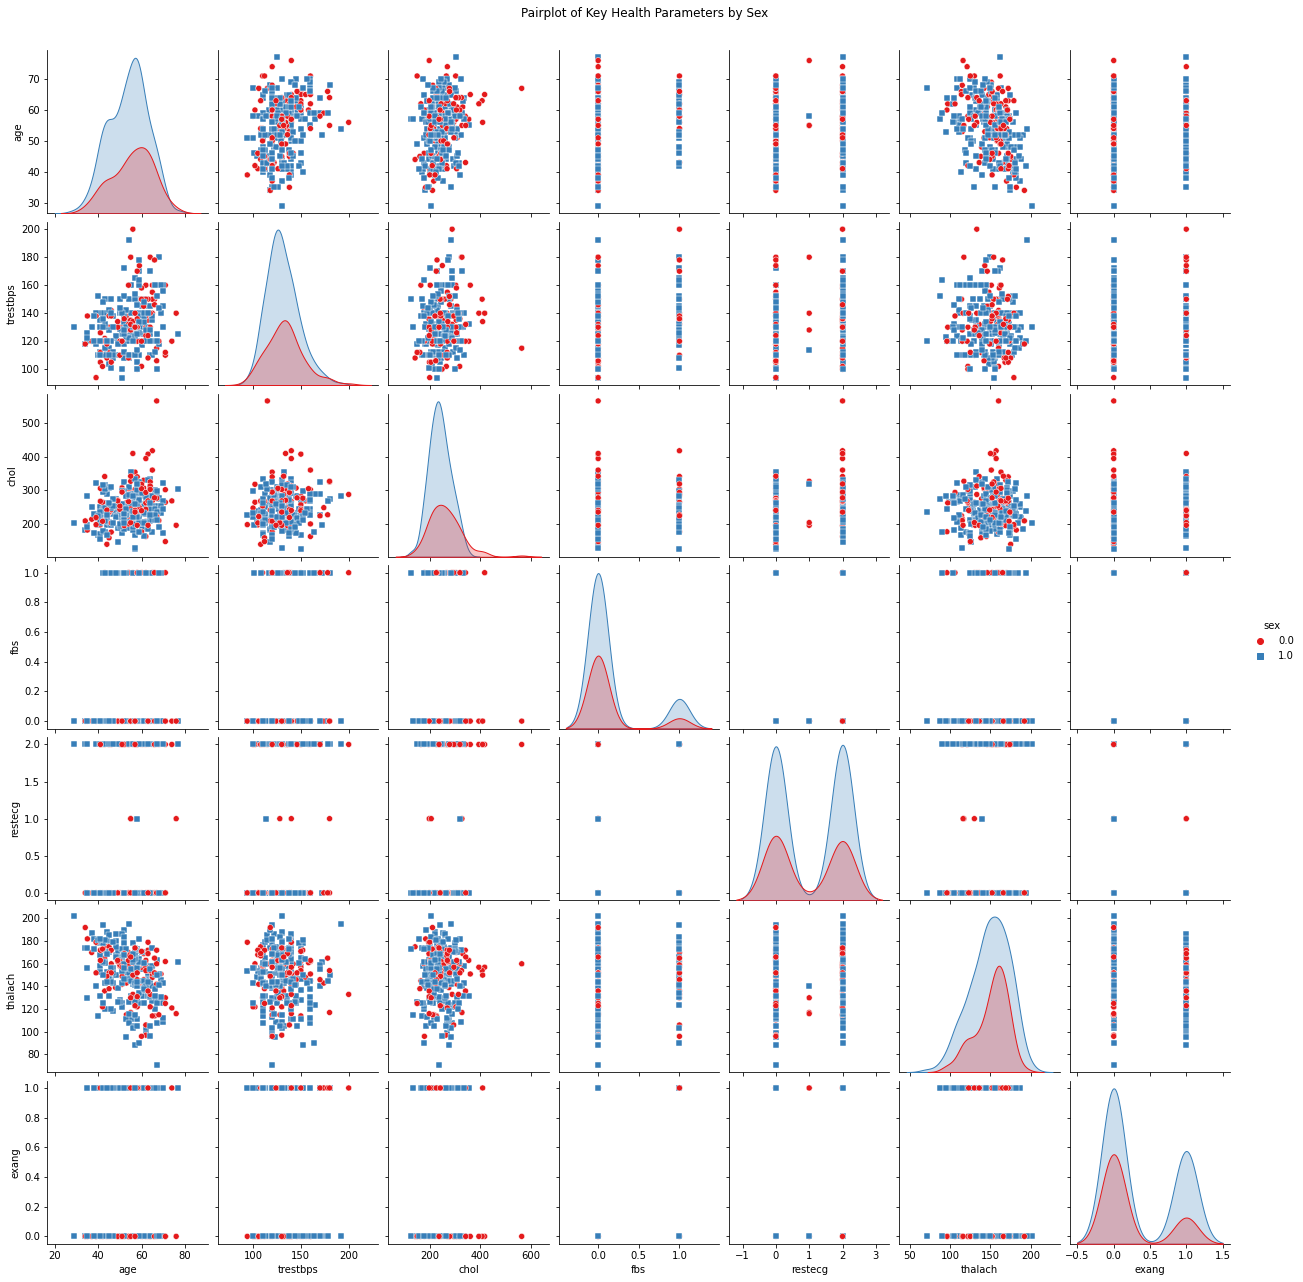

In [76]:
X.loc[:, 'sex'] = patients['sex']

sns.pairplot(X, hue='sex', palette='Set1', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot of Key Health Parameters by Sex', y=1.02)
plt.show()

Heatmap

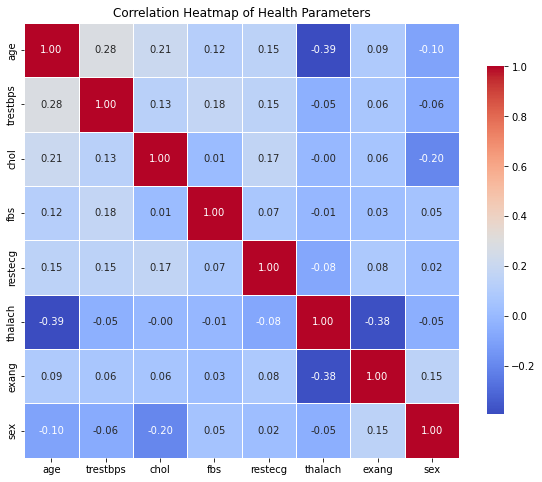

In [77]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap of Health Parameters')
plt.show()

Train Classifiers

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [85]:
X = patients.copy()
X = X.drop(columns=['goal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [106]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import numpy as np

In [113]:
def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificities = []
    for i in range(cm.shape[0]):  # Loop through each class
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]  # True Negatives
        fp = np.sum(cm[:, i]) - cm[i, i]  # False Positives
        specificities.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return np.mean(specificities)  # Return average specificity

In [114]:
results = {
    'Model': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': []
}

In [115]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

y_pred = logreg.predict(X_test)

train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)
sensitivity = recall_score(y_test, y_pred, average='macro')
speci = specificity(y_test, y_pred)

results['Model'].append('logistic regression')
results['Accuracy'].append(test_accuracy)
results['Sensitivity'].append(sensitivity)
results['Specificity'].append(speci)


Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.59


In [116]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
sensitivity = recall_score(y_test, y_pred, average='macro')
speci = specificity(y_test, y_pred)

results['Model'].append('knn')
results['Accuracy'].append(test_accuracy)
results['Sensitivity'].append(sensitivity)
results['Specificity'].append(speci)

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.55


In [117]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

train_accuracy = gnb.score(X_train, y_train)
test_accuracy = gnb.score(X_test, y_test)
sensitivity = recall_score(y_test, y_pred, average='macro')
speci = specificity(y_test, y_pred)

results['Model'].append('gaussian naive bayes')
results['Accuracy'].append(test_accuracy)
results['Sensitivity'].append(sensitivity)
results['Specificity'].append(speci)

Accuracy of GNB classifier on training set: 0.41
Accuracy of GNB classifier on test set: 0.39


In [118]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
sensitivity = recall_score(y_test, y_pred, average='macro')
speci = specificity(y_test, y_pred)

results['Model'].append('svm')
results['Accuracy'].append(test_accuracy)
results['Sensitivity'].append(sensitivity)
results['Specificity'].append(speci)

Accuracy of SVM classifier on training set: 0.70
Accuracy of SVM classifier on test set: 0.57


In [119]:
results_df = pd.DataFrame(results)

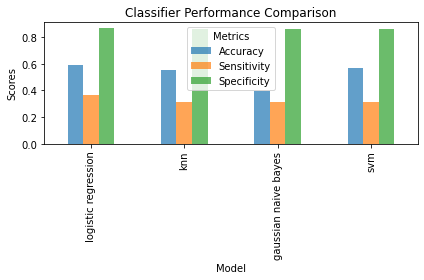

In [124]:
# Create grouped bar chart
results_df.set_index('Model').plot(kind='bar', alpha=0.7)
plt.title('Classifier Performance Comparison')
plt.ylabel('Scores')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# Confusion Matrix Heatmaps
